<a href="https://colab.research.google.com/github/kunal-git-002/face-recognition/blob/master/more_face_in_one_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install face_recognition

**more faces in one frame or image**

In [77]:
import face_recognition as fr
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def read_img(path):

  img=cv2.imread(path)
  h,w=img.shape[:2]
  new_width=500
  ratio=(new_width/w)

  new_height=int(h*ratio)

  img=cv2.resize(img,(new_width,new_height))

  return img

img=read_img("/content/drive/My Drive/face recognition/datas/unknown/elon_musk2.jpg")
cv2_imshow(img)


**step 1: Training process**

In [79]:
names=[]#name of person during encoding
encodings=[]#encoding value of that perticuler person

path_of_folder="/content/drive/My Drive/face recognition/datas/known"

for item in os.listdir(path_of_folder):

  img=read_img(path_of_folder+"/"+item)

  face_enc=fr.face_encodings(img)[0]
  encodings.append(face_enc)

  name=item.split(".")[0]
  names.append(name)


**step 2: testing process & extract all datas from unkonwn image**

In [80]:
#path="/content/drive/My Drive/face recognition/datas/unknown/all3.jpg"#path of image for testing

def extract_data(path):

  #decler global variables
  global person_names
  global faces_locs
  global img

  img=read_img(path)#

  temp_img=img.copy()

  person_names=[]#1
  faces_locs=fr.face_locations(temp_img)#2

  for i in faces_locs:
    y1,x2,y2,x1=i

    crop_img=temp_img[y1:y2,x1:x2]#crop faces from image #for make a black
    #cv2_imshow(crop_img)

    face_enc=fr.face_encodings(temp_img)[0]
    result=fr.compare_faces(encodings,face_enc)

    face_dis=fr.face_distance(encodings,face_enc)#
    
    row=x2-x1
    col=y2-y1

    temp_img[y1:y2,x1:x2]=np.zeros(shape=(col,row,3))

    if any(result)==True:

      ind=np.argmin(face_dis)
      person=names[ind]
      person_names.append(person)

    else:
      
      person="unknown"
      person_names.append(person)
  
  return img,person_names,faces_locs
  # print("\n",person,"\n",conf,"\n",result)




**step 3: show the results on image**

**all the process is done now we only see all faces in one image , now we seeing using cv2** 

In [81]:
 #draw rectangle around faces
 #write there names
 
 def show_res(img,person_names,faces_locs):

    for i in range(len(person_names)):

      y1,x2,y2,x1=faces_locs[i]#points used for rectangle
      label=str(person_names[i])

      #draw rectangle
      cv2.rectangle(img,
                    (x1,y1),
                    (x2,y2),
                    (0,255,0),
                    3)
      #write text
      font=cv2.FONT_HERSHEY_PLAIN
      cv2.putText(img,
                  label,
                  (x1,y1-10),
                  font,
                  1,
                  (255,0,0),
                  2)
      if i==len(person_names)-1:
        cv2_imshow(img)


***for  showing final result just simpley run below code***

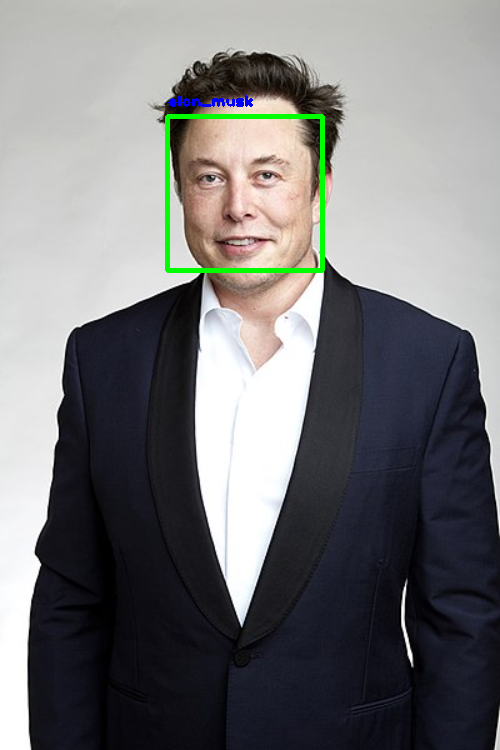

In [87]:
path="/content/drive/My Drive/face recognition/datas/unknown/elon_musk2.jpg"#

def show_final_result(path):

  img,person_names,faces_locs=extract_data(path)#function 1 

  show_res(img,person_names,faces_locs)#function 2


show_final_result(path)

